# Chains in LangChain
Chains refer to sequences of calls - whether to an LLM, a tool, or a data preprocessing step. 
## Outline

* LLMChain
* Sequential Chains
  * SimpleSequentialChain
  * SequentialChain
* Router Chain

In [ ]:
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

In [ ]:
from langchain.chat_models import ChatOpenAI  ##--> LLm model
from langchain.prompts import ChatPromptTemplate  ##-->Prompt
from langchain.chains import LLMChain

In [ ]:
llm_model="gpt-3.5-turbo-0301"

llm = ChatOpenAI(temperature=0.9,model=llm_model)

In [ ]:
prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe a company that makes {product}")

In [ ]:
chain=LLMChain(llm=llm,prompt=prompt)

In [ ]:
product='Beard trimmmer'

chain.run(product)

In [ ]:
product='Head phones'

chain.run(product)

# * Sequential Chains


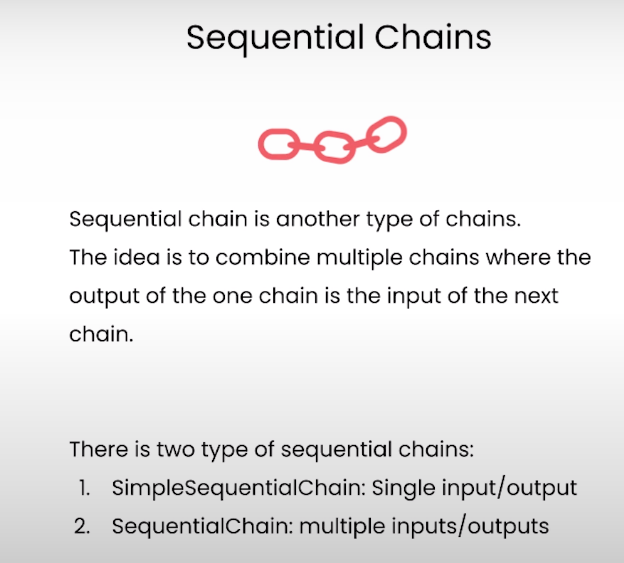

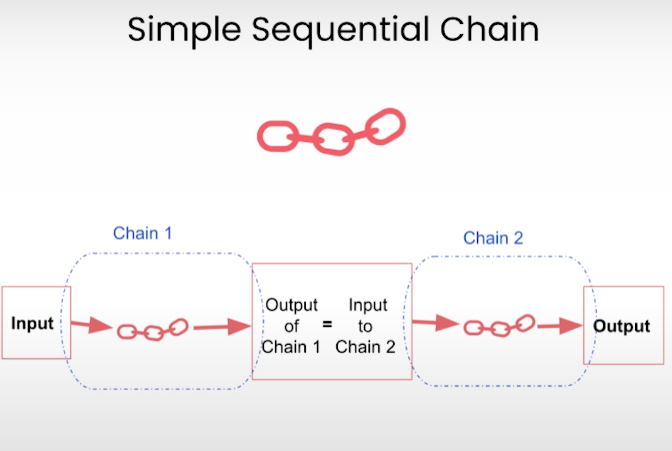

In [ ]:
from langchain.chat_models import ChatOpenAI  

from langchain.prompts import ChatPromptTemplate

from langchain.chains import LLMChain

from langchain.chains import SimpleSequentialChain

In [ ]:
llm_model="gpt-3.5-turbo-0301"

llm=ChatOpenAI(temperature=0.9,model=llm_model)

## Chain 1

In [ ]:

first_prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe a company that makes {product}"
)
chain_one= LLMChain(llm=llm,prompt=first_prompt)

## Chain 2

In [ ]:
second_promt= ChatPromptTemplate.from_template(
    "Write a 20 words description for the following comany:{company_name}"
)

chain_tow=LLMChain(llm=llm,prompt=second_promt)

In [ ]:
overall_simple_chain = SimpleSequentialChain(chains=[chain_one,chain_tow]
                                             ,verbose=True)

In [ ]:
overall_simple_chain.run("Ear phones")

* SequentialChain

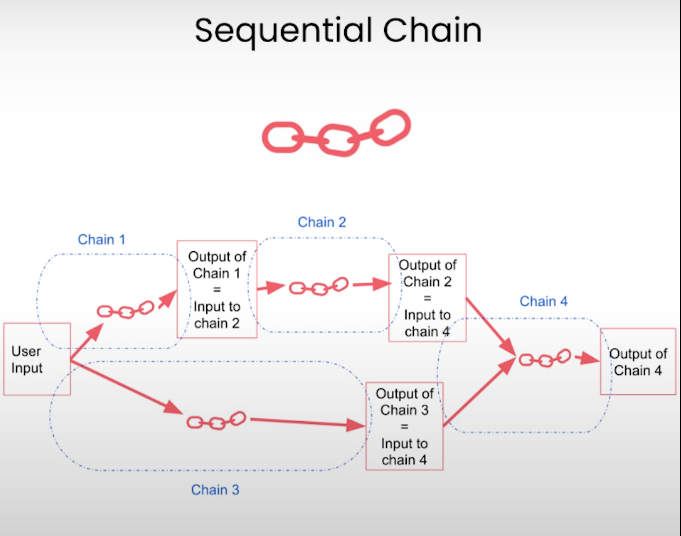

In [ ]:
from langchain.chat_models import ChatOpenAI 
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain
from langchain.chains import SequentialChain

In [ ]:
llm_model="gpt-3.5-turbo-0301"
llm=ChatOpenAI(temperature=0.9,model=llm_model)

## Chain 1

In [ ]:
first_promt= ChatPromptTemplate.from_template(
    "Traslate the following review to english\
        {Review}"
)

chain_one=LLMChain(llm=llm,prompt=first_promt,output_key="English_review")

## Chain 2

In [ ]:
second_promt=ChatPromptTemplate.from_template(
    "Can you summarize the review in 1 sentence\
        {English_review}"
)

chain_two=LLMChain(llm=llm,prompt=second_promt,output_key="summary")

## Chain 3

In [ ]:
third_promt=ChatPromptTemplate.from_template(
    "What language is the following review\
        {Review}"
)

chain_three=LLMChain(llm=llm,prompt=third_promt,output_key="language")

## Chain 4

In [ ]:
fourth_promt=ChatPromptTemplate.from_template(
    "Write a follow up response to the following summary in the specific language specified language summary:{summary},language:{language}\
        {Review}"
)

chain_four=LLMChain(llm=llm,prompt=fourth_promt,output_key="followup_message")

In [ ]:
overall_chain = SequentialChain(chains=[chain_one,chain_two,chain_three,chain_four],
                                input_variables=["Review"],
                                output_variables=["summary","language","followup_message"]
                                             ,verbose=True)

In [ ]:
review = "Je trouve le goût médiocre. La mousse ne tient pas, c'est bizarre. J'achète les mêmes dans le commerce et le goût est bien meilleur...\nVieux lot ou contrefaçon !?"

overall_chain(review)

# * Router Chain

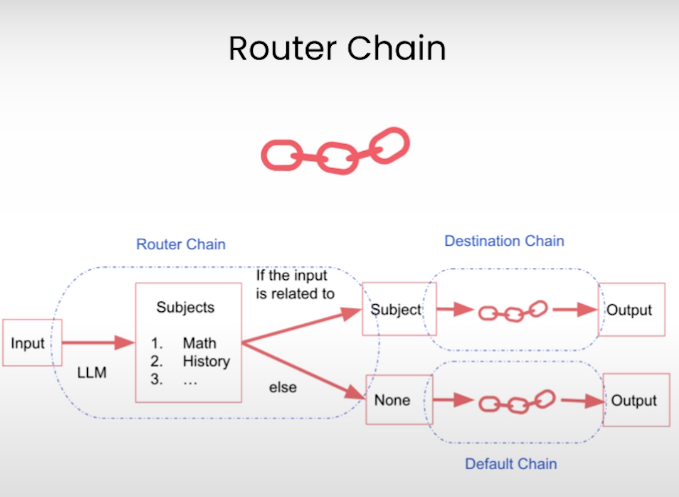

In [ ]:

physics_template = """You are a very smart physics professor. \
You are great at answering questions about physics in a concise\
and easy to understand manner. \
When you don't know the answer to a question you admit\
that you don't know.

Here is a question:
{input}"""


math_template = """You are a very good mathematician. \
You are great at answering math questions. \
You are so good because you are able to break down \
hard problems into their component parts, 
answer the component parts, and then put them together\
to answer the broader question.

Here is a question:
{input}"""

history_template = """You are a very good historian. \
You have an excellent knowledge of and understanding of people,\
events and contexts from a range of historical periods. \
You have the ability to think, reflect, debate, discuss and \
evaluate the past. You have a respect for historical evidence\
and the ability to make use of it to support your explanations \
and judgements.

Here is a question:
{input}"""


computerscience_template = """ You are a successful computer scientist.\
You have a passion for creativity, collaboration,\
forward-thinking, confidence, strong problem-solving capabilities,\
understanding of theories and algorithms, and excellent communication \
skills. You are great at answering coding questions. \
You are so good because you know how to solve a problem by \
describing the solution in imperative steps \
that a machine can easily interpret and you know how to \
choose a solution that has a good balance between \
time complexity and space complexity. 

Here is a question:
{input}"""






In [ ]:
prompt_infos = [
    {
        "name": "physics", 
        "description": "Good for answering questions about physics", 
        "prompt_template": physics_template
    },
    {
        "name": "math", 
        "description": "Good for answering math questions", 
        "prompt_template": math_template
    },
    {
        "name": "History", 
        "description": "Good for answering history questions", 
        "prompt_template": history_template
    },
    {
        "name": "computer science", 
        "description": "Good for answering computer science questions", 
        "prompt_template": computerscience_template
    }
]

In [ ]:
from langchain.chains.router import MultiPromptChain
from langchain.chains.router.llm_router import LLMRouterChain,RouterOutputParser
from langchain.prompts import PromptTemplate

In [ ]:
llm = ChatOpenAI(temperature=0.9,model=llm_model)

In [ ]:
destination_chains={}

for p_info in prompt_infos:
    name=p_info["name"]
    prompt_template=p_info["prompt_template"]
    prompt=ChatPromptTemplate.from_template(template=prompt_template)
    chain=LLMChain(llm=llm,prompt=prompt)
    destination_chains[name]=chain

destinations=[f"{p['name']}: {p['description']}" for p in prompt_infos]

In [ ]:
destination_chains

In [ ]:
destinations=[f"{p['name']}: {p['description']}" for p in prompt_infos]
destinations

In [ ]:
destinations_str="\n".join(destinations)
destinations_str

In [ ]:
default_promt = ChatPromptTemplate.from_template("{input}")
default_chain=LLMChain(llm=llm,prompt=default_promt)

In [ ]:

MULTI_PROMPT_ROUTER_TEMPLATE = """Given a raw text input to a \
language model select the model prompt best suited for the input. \
You will be given the names of the available prompts and a \
description of what the prompt is best suited for. \
You may also revise the original input if you think that revising\
it will ultimately lead to a better response from the language model.

<< FORMATTING >>
Return a markdown code snippet with a JSON object formatted to look like:
```json
{{{{
    "destination": string \ name of the prompt to use or "DEFAULT"
    "next_inputs": string \ a potentially modified version of the original input
}}}}
```

REMEMBER: "destination" MUST be one of the candidate prompt \
names specified below OR it can be "DEFAULT" if the input is not\
well suited for any of the candidate prompts.
REMEMBER: "next_inputs" can just be the original input \
if you don't think any modifications are needed.

<< CANDIDATE PROMPTS >>
{destinations}

<< INPUT >>
{{input}}

<< OUTPUT (remember to include the ```json)>>"""

In [ ]:
router_template = MULTI_PROMPT_ROUTER_TEMPLATE.format(destinations=destinations_str)

router_prompt=PromptTemplate(
    template=router_template,
    input_variables=["input"],
    output_parser=RouterOutputParser(),
)

router_chain=LLMRouterChain.from_llm(llm,router_prompt)

In [ ]:
chain=MultiPromptChain(router_chain=router_chain,
                       destination_chains=destination_chains,
                       default_chain=default_chain,
                       verbose=True)

In [ ]:
chain.run("What is newton laws")

In [ ]:
chain.run("What is 4*5")

In [ ]:
chain.run("What is a plant cell consist of ")